In [ ]:
Importation des librairie Keras
Génération des données avec un peu de bruit 

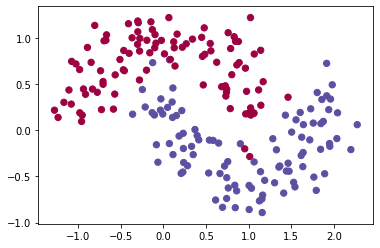

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers

# 1 - Generation d'un jeu de donnees

np.random.seed(3)
# Jeu de donnees obtenu avec make_blobs
#X0,yt0=datasets.make_blobs(n_samples=200,centers=2)
# Jeu de donnees obtenu avec make_moons
X0,yt0=datasets.make_moons(200,noise=0.20)
plt.scatter(X0[:,0],X0[:,1],s=40,c=yt0,cmap=plt.cm.Spectral)

Division en train et en ensembles de test.
Création d'un modèle de classification sigmoid sur des données d'etrainement X
Affichage des données de prédiction
sur 150 itération

Epoch 1/30
150/150 [==============================] - 0s 2ms/step - loss: 1.0419 - acc: 0.1600
Epoch 2/30
150/150 [==============================] - 0s 851us/step - loss: 0.7918 - acc: 0.1467
Epoch 3/30
150/150 [==============================] - 0s 812us/step - loss: 0.6445 - acc: 0.6733
Epoch 4/30
150/150 [==============================] - 0s 813us/step - loss: 0.5564 - acc: 0.7600
Epoch 5/30
150/150 [==============================] - 0s 836us/step - loss: 0.5000 - acc: 0.7733
Epoch 6/30
150/150 [==============================] - 0s 909us/step - loss: 0.4616 - acc: 0.7933
Epoch 7/30
150/150 [==============================] - 0s 913us/step - loss: 0.4342 - acc: 0.8267
Epoch 8/30
150/150 [==============================] - 0s 871us/step - loss: 0.4137 - acc: 0.8200
Epoch 9/30
150/150 [==============================] - 0s 837us/step - loss: 0.3976 - acc: 0.8400
Epoch 10/30
150/150 [==============================] - 0s 915us/step - loss: 0.3848 - acc: 0.8467
Epoch 11/30
150/150 [==========

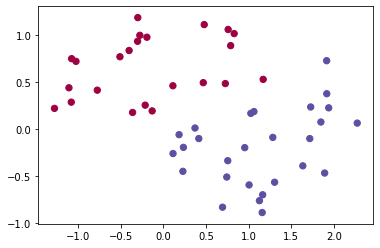

In [0]:
# 2 - Splitting en training set et testing set
# => training set
x_train = X0[:150]
y_train = yt0[:150]
# => testing set
x_test = X0[150:]
y_test = yt0[150:]

# 3 - Perceptron avec Keras
model = Sequential()
model.add(Dense(1, input_dim=2, activation='sigmoid'))

sgd = optimizers.SGD(lr=0.01, decay=1e-5, momentum=0.8, nesterov=True)
model.compile(loss='binary_crossentropy', 
              optimizer='sgd',
              metrics=['accuracy'])

model.fit(x_train, y_train,epochs=30,batch_size=1)
score = model.evaluate(x_test, y_test, batch_size=1)

# 4 - y predit par le perceptron pour x_test

prediction=model.predict(x_test,batch_size=1)
error=0.0
for i in range(len(x_test)):
  if prediction[i]>=0.5:
    prediction[i]=1
  else:
    prediction[i]=0
  l=prediction[i]-y_test[i]
  error += l**2

y = [y for p in prediction for y in p]

plt.scatter(x_test[:,0],x_test[:,1],s=40,c=y,cmap=plt.cm.Spectral)

Ici, on affiche notre fonction plot_decision_boundary et lui faire utiliser une carte de couleurs divergente, pour faire apparaitre les différentes classification du set.Taux de réussite de 86%.

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fb979e08438>)

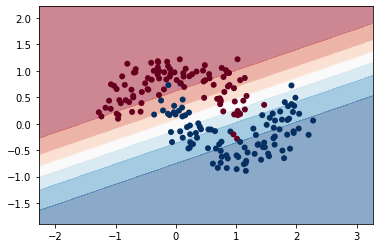

In [0]:
def plot_decision_boundary(X, y, model, steps=1000, cmap='Paired'):
    """
    Function to plot the decision boundary and data points of a model.
    Data points are colored based on their actual label.
    """
    cmap = plt.get_cmap(cmap)
    
    # Define region of interest by data limits
    xmin, xmax = X[:,0].min() - 1, X[:,0].max() + 1
    ymin, ymax = X[:,1].min() - 1, X[:,1].max() + 1
    steps = 1000
    x_span = np.linspace(xmin, xmax, steps)
    y_span = np.linspace(ymin, ymax, steps)
    xx, yy = np.meshgrid(x_span, y_span)

    # Make predictions across region of interest
    labels = model.predict(np.c_[xx.ravel(), yy.ravel()])

    # Plot decision boundary in region of interest
    z = labels.reshape(xx.shape)
    
    fig, ax = plt.subplots()
    ax.contourf(xx, yy, z, cmap=cmap, alpha=0.5)

    # Get predicted labels on training data and plot
    train_labels = model.predict(X)
    ax.scatter(X[:,0], X[:,1], c=y, cmap=cmap, lw=0)
    
    return fig, ax

plot_decision_boundary(X0,yt0,model,cmap='RdBu')